In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df= pd.read_csv("only_variable_with_corr_name.csv")

In [3]:
df

,Latitude,Longitude,Time,Albedo,Downward_Long-Wave_Rad_Flux,Downward_Short-Wave_Rad_Flux,Wind_Gust,Planetary_Boundary_Layer_Height,Latent_Heat_Flux,Pressure,...,ULWRF_L1_Avg_1,USWRF_L1_Avg_1,Vertical_motion,Visibility,Station Name,PM 2.5,AOD,Precipitation_Rate,Sine_of_Month,Cosine_of_Month
0,22.630,88.352,2021-01-01,5.98142,312.559000,204.350000,3.826027,301.986018,30.057888,101429.166812,...,421.298931,24.68100,-3.067933,24135.001953,Belur Math,77.654583,0.581550,0.000000e+00,0.500000,0.866025
1,22.630,88.352,2021-01-02,5.97004,313.683534,202.960000,3.101588,267.144669,30.471104,101373.725500,...,422.392632,24.65800,-2.350824,24135.046875,Belur Math,58.124737,0.425139,0.000000e+00,0.500000,0.866025
2,22.630,88.352,2021-01-03,5.93766,322.803813,195.740000,2.774223,262.226417,28.723234,101257.671000,...,425.339199,23.57400,-2.127140,24135.080078,Belur Math,NaN,0.665841,0.000000e+00,0.500000,0.866025
3,22.630,88.352,2021-01-04,5.91420,333.227000,202.500000,2.184178,245.017254,29.531700,101243.457063,...,432.330161,24.27400,-1.479325,24134.914062,Belur Math,76.667778,0.415729,0.000000e+00,0.500000,0.866025
4,22.630,88.352,2021-01-05,5.89578,342.897000,200.550000,2.317436,244.012100,30.009221,101231.065125,...,439.300757,24.09300,-0.909857,24134.949219,Belur Math,92.684583,0.384968,0.000000e+00,0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9725,22.545,88.340,2023-08-27,11.06430,447.360698,218.351436,4.011113,509.447365,121.838930,100109.151406,...,480.649783,21.86660,1.165340,24134.960938,Victoria,40.327917,0.810233,3.322000e-06,-0.866025,-0.500000
9726,22.545,88.340,2023-08-28,11.38305,446.798837,254.572562,3.222736,348.428543,132.334216,100105.622344,...,491.225494,25.90458,0.574886,24134.876953,Victoria,60.819167,0.810233,0.000000e+00,-0.866025,-0.500000
9727,22.545,88.340,2023-08-29,11.53260,449.412098,170.017404,2.810299,586.165287,94.150990,100182.874219,...,486.897797,17.79536,0.228833,24135.013672,Victoria,70.484583,0.810233,1.620000e-07,-0.866025,-0.500000
9728,22.545,88.340,2023-08-30,11.89660,444.362351,238.533522,2.842451,508.752148,110.109848,100287.627813,...,494.799905,25.23142,0.528769,24134.886719,Victoria,68.857619,0.810233,4.600000e-08,-0.866025,-0.500000


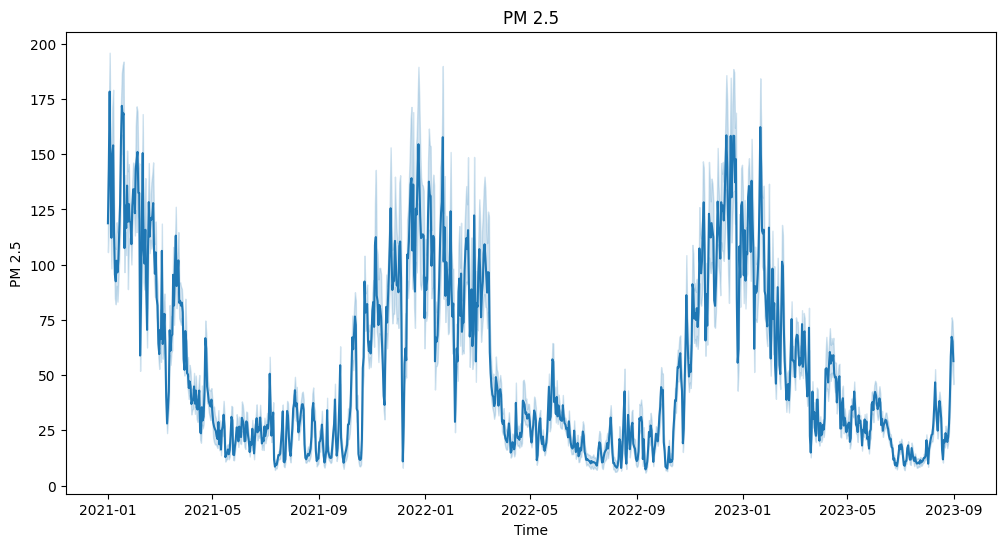

In [10]:
df['Time'] = pd.to_datetime(df['Time'])
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='PM 2.5', data=df)
plt.title('PM 2.5')
plt.show()

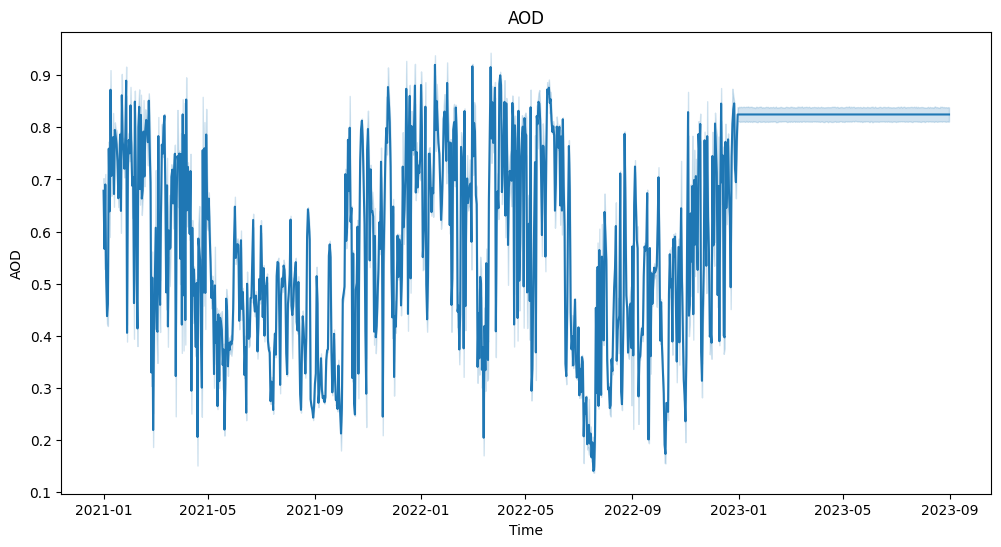

In [11]:
df['Time'] = pd.to_datetime(df['Time'])
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='AOD', data=df)
plt.title('AOD')
plt.show()

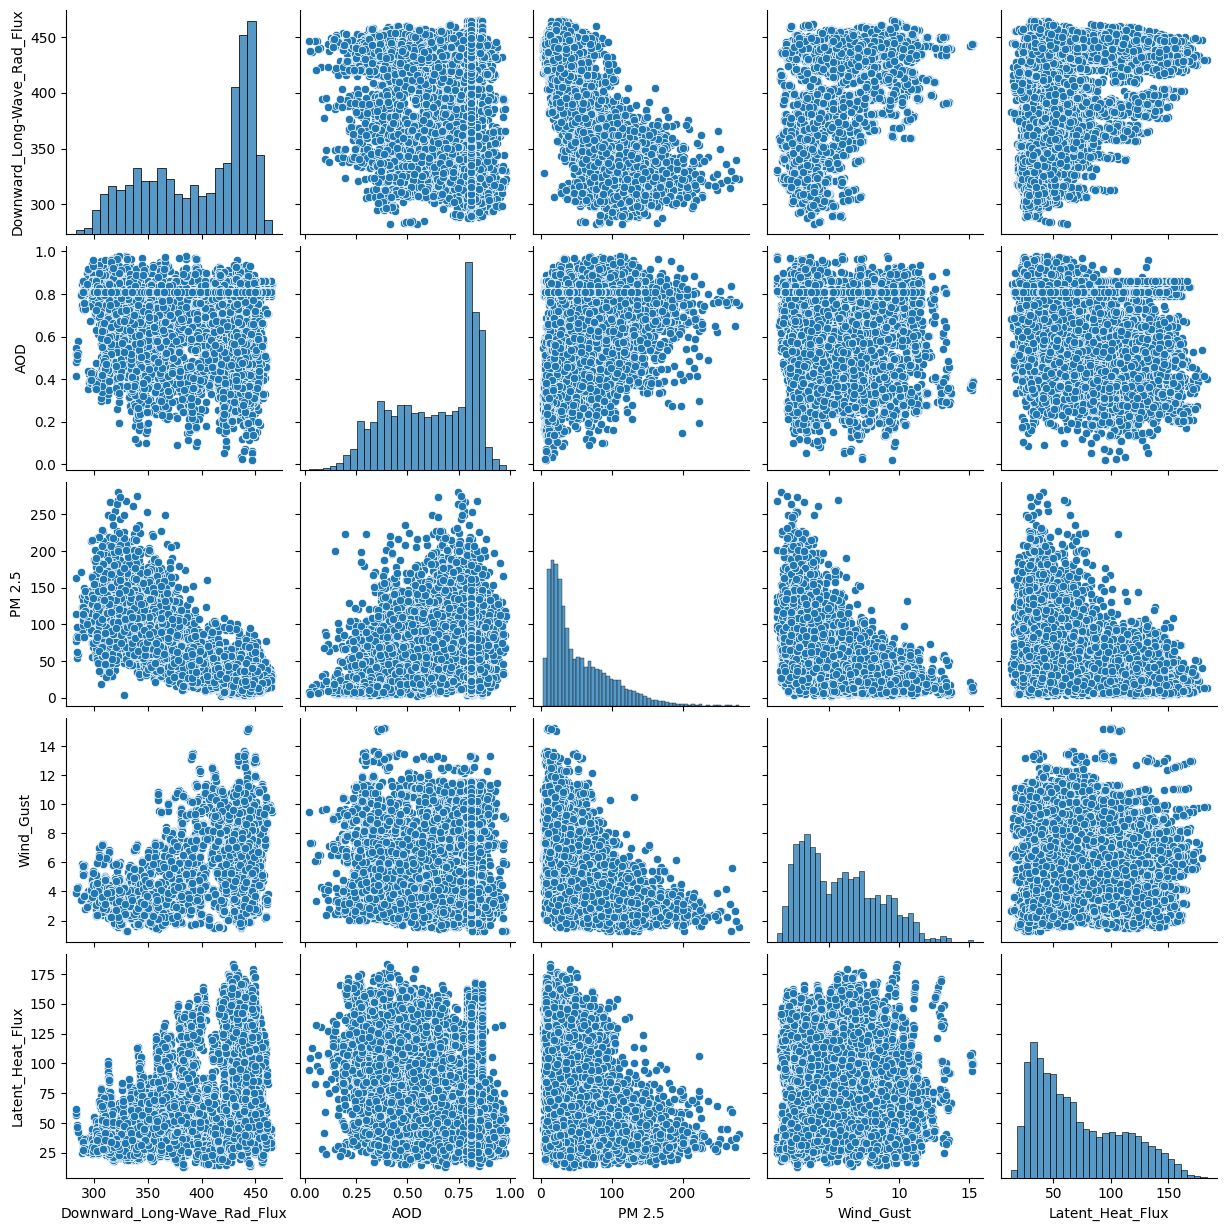

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['Downward_Long-Wave_Rad_Flux', 'AOD', 'PM 2.5', 'Wind_Gust', 'Latent_Heat_Flux']])
plt.show()


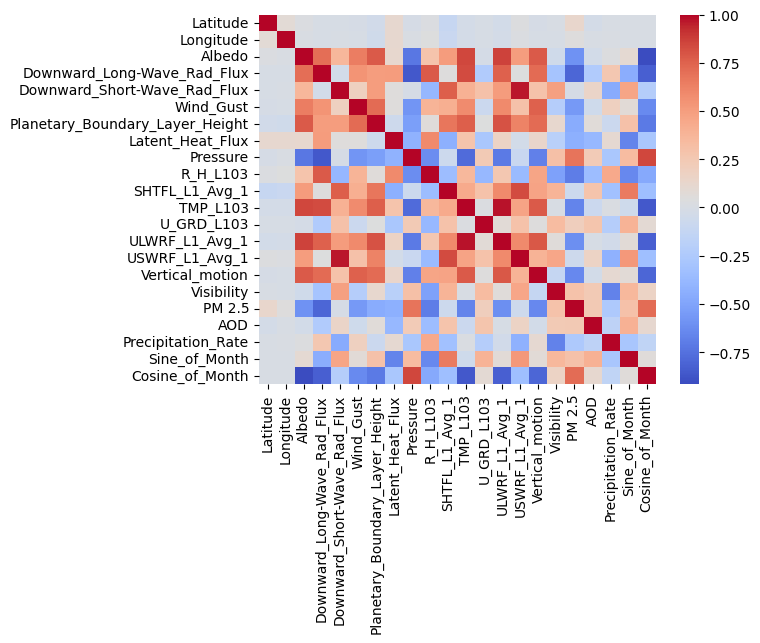

In [18]:
df1=  df.drop(["Station Name","Time"], axis=1)
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.show()


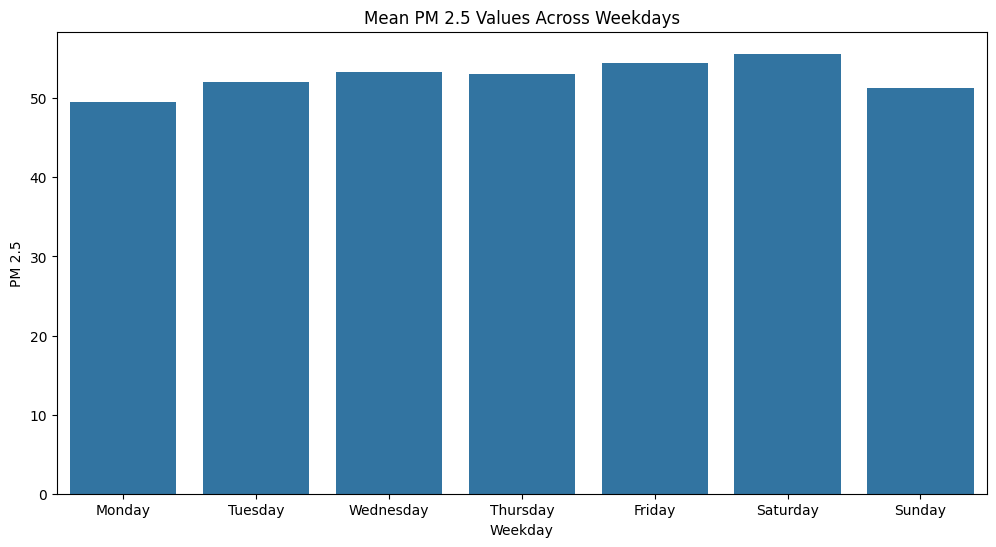

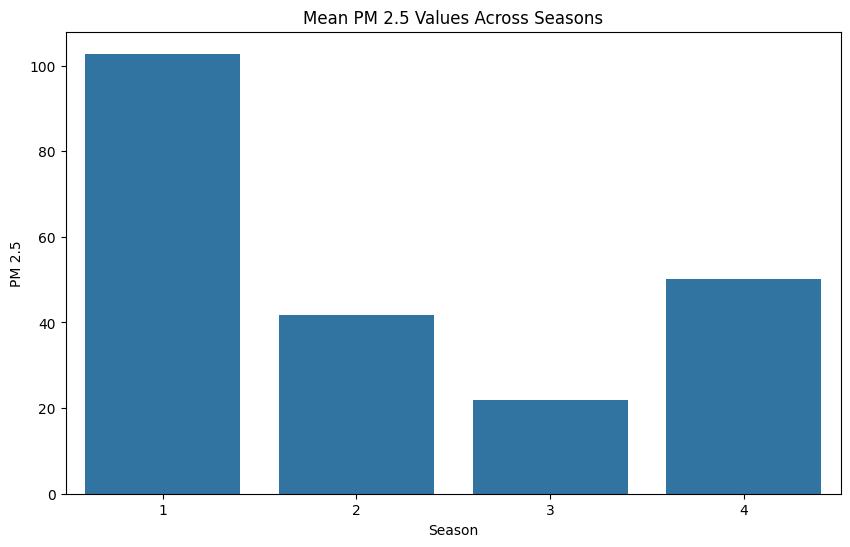

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Time' column is already in datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Extract weekday and season from the 'Time' column
df['Weekday'] = df['Time'].dt.day_name()
df['Season'] = df['Time'].dt.month % 12 // 3 + 1

# Calculate mean of PM 2.5 values for each weekday
weekday_mean = df.groupby('Weekday')['PM 2.5'].mean().reset_index()

# Plotting mean PM 2.5 values for weekdays
plt.figure(figsize=(12, 6))
sns.barplot(x='Weekday', y='PM 2.5', data=weekday_mean, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Mean PM 2.5 Values Across Weekdays')
plt.show()

# Calculate mean of PM 2.5 values for each season
season_mean = df.groupby('Season')['PM 2.5'].mean().reset_index()

# Plotting mean PM 2.5 values for seasons
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='PM 2.5', data=season_mean)
plt.title('Mean PM 2.5 Values Across Seasons')
plt.show()


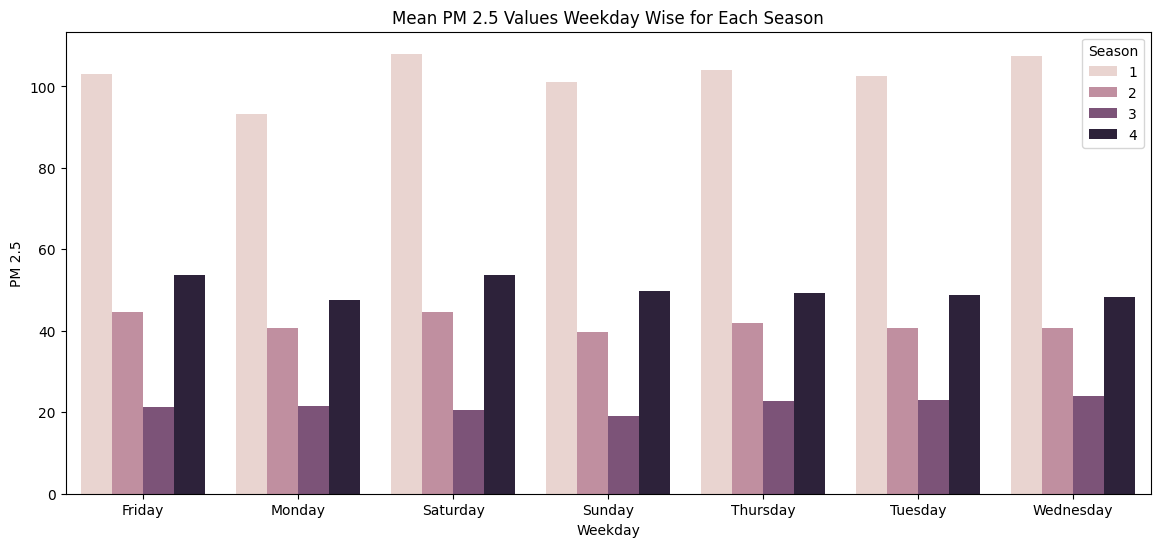

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Time' column is already in datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Extract weekday and season from the 'Time' column
df['Weekday'] = df['Time'].dt.day_name()
df['Season'] = df['Time'].dt.month % 12 // 3 + 1

# Group by season and weekday, calculate the mean of PM 2.5 for each group
grouped_data = df.groupby(['Season', 'Weekday'])['PM 2.5'].mean().reset_index()

# Plotting mean PM 2.5 values weekday wise for each season
plt.figure(figsize=(14, 6))
sns.barplot(x='Weekday', y='PM 2.5', hue='Season', data=grouped_data)
plt.title('Mean PM 2.5 Values Weekday Wise for Each Season')
plt.show()


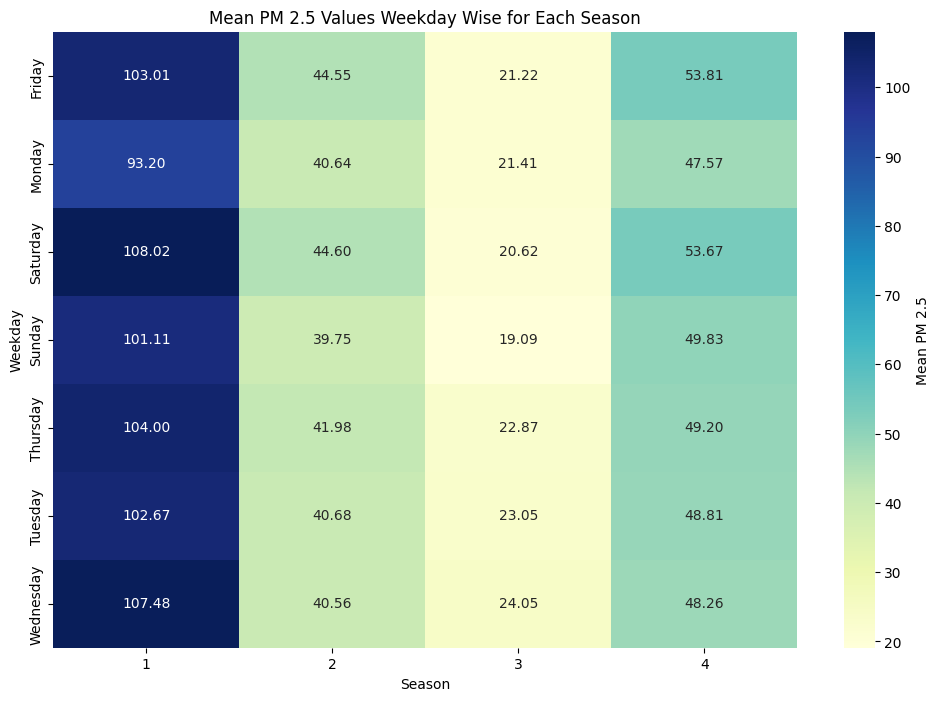

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Time' column is already in datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Extract weekday and season from the 'Time' column
df['Weekday'] = df['Time'].dt.day_name()
df['Season'] = df['Time'].dt.month % 12 // 3 + 1

# Create a pivot table to get mean PM 2.5 values for each season and weekday
pivot_table = df.pivot_table(values='PM 2.5', index='Weekday', columns='Season', aggfunc='mean')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2f", cbar_kws={'label': 'Mean PM 2.5'})
plt.title('Mean PM 2.5 Values Weekday Wise for Each Season')
plt.show()


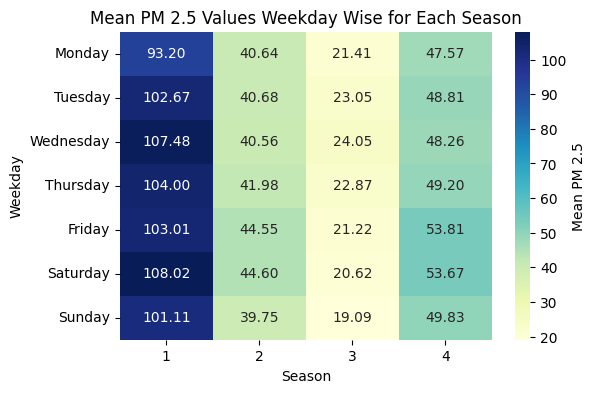

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

# Assuming 'Time' column is already in datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Extract weekday and season from the 'Time' column
df['Weekday'] = df['Time'].dt.day_name()
df['Season'] = df['Time'].dt.month % 12 // 3 + 1

# Specify the order of weekdays
weekday_order = list(calendar.day_name)

# Convert 'Weekday' to a categorical variable with the specified order
df['Weekday'] = pd.Categorical(df['Weekday'], categories=weekday_order, ordered=True)

# Create a pivot table to get mean PM 2.5 values for each season and weekday
pivot_table = df.pivot_table(values='PM 2.5', index='Weekday', columns='Season', aggfunc='mean')

# Plotting the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2f", cbar_kws={'label': 'Mean PM 2.5'})
plt.title('Mean PM 2.5 Values Weekday Wise for Each Season')
plt.show()
